#Steps:
0. Preprocess + EDA +Feature Selection
1. Extract input and output columns
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


Preprocessing

In [ ]:
df=df.iloc[:,1:] #Need all rows from dataset but column should be 1 onwards
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


EDA

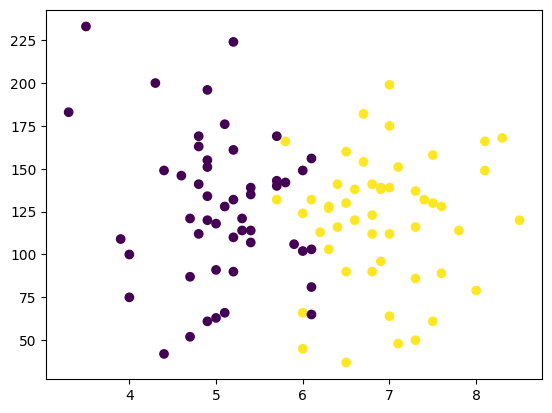

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

Feature Selection

In [ ]:
x=df.iloc[:,0:2] #input variable having all rows and columns from 0 to 1
y=df.iloc[:,-1] #output variable having all rows and last column

Train test split

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1)

Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
X_train = scaler.fit_transform(X_train)

In [51]:
X_test = scaler.transform(X_test)

In [52]:
X_test

array([[ 0.43443579,  0.45745109],
       [ 1.96950915,  1.08543458],
       [ 0.97622639, -1.47673807],
       [-0.82974227, -1.50185741],
       [-0.55884697, -0.04493571],
       [ 0.70533109,  0.7840025 ],
       [ 0.97622639,  1.31150863],
       [ 2.15010602,  1.13567326],
       [ 1.69861385, -0.22077109],
       [-1.01033913,  0.45745109]])

Train Model

In [53]:
from sklearn.linear_model import LogisticRegression

In [56]:
clf=LogisticRegression() #creating object of LogisticRegression class as clf

In [57]:
clf.fit(X_train,Y_train) #fit function used to train the model

LogisticRegression()

Model Evaluation

In [58]:
Y_pred=clf.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(Y_test,Y_pred)

1.0

Plotting decision regions

In [65]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

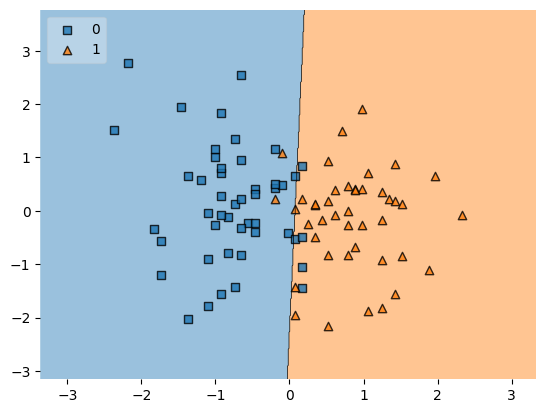

In [66]:
plot_decision_regions(X_train,Y_train.values,clf=clf, legend=2)

In [67]:
import pickle #used to convert python object into file to use in other environment

In [68]:
pickle.dump(clf,open('model.pkl','wb')) #dumping the classifier into model.pkl file in write binary mode.